In [ ]:
import torch 
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

import os

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [3]:
torch.manual_seed(42)

In [4]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU available:", torch.cuda.get_device_name(0))

elif torch.backends.mps.is_available():
    device = torch.device("mps")
    print("MPS available")

else:
    device = torch.device("cpu")
    print("Using CPU")

# device = torch.device("cpu")
dtype = torch.float32

GPU available: NVIDIA GeForce RTX 5070 Ti


In [5]:
df = pd.read_csv('data/mnist_train.csv')
df.head(5)

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


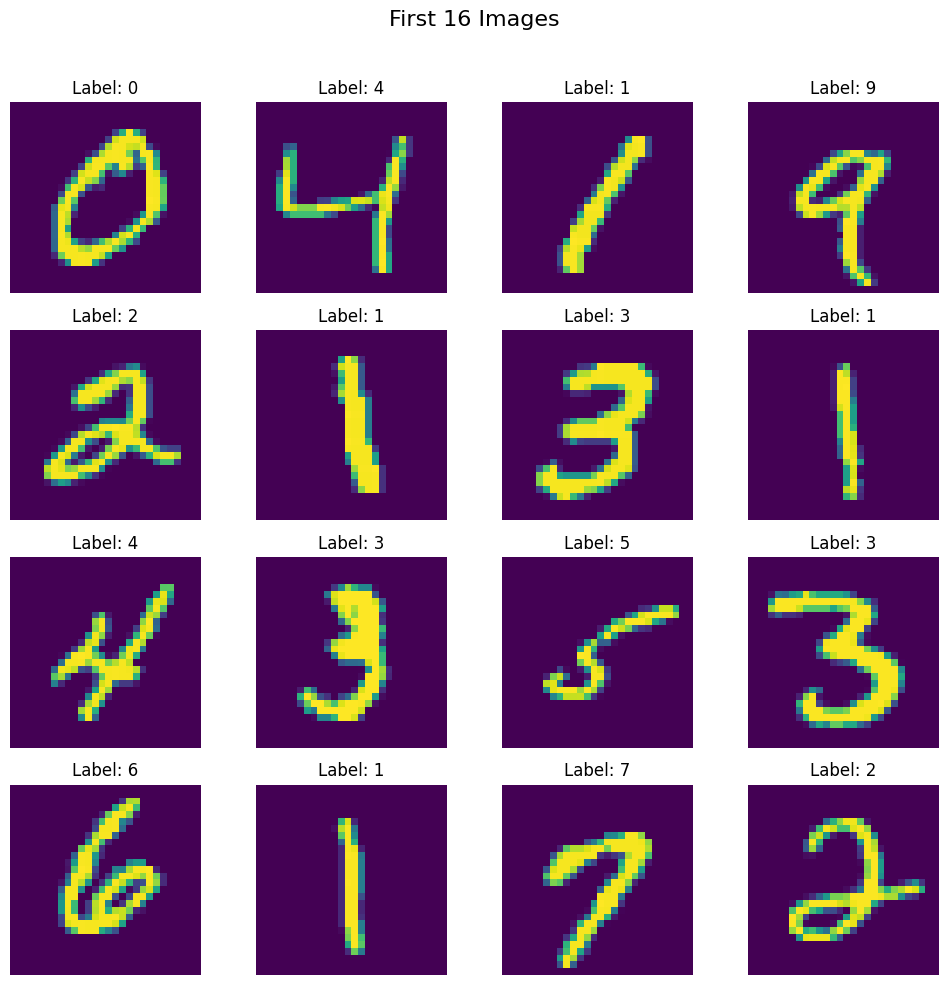

In [6]:
fig, axes = plt.subplots(4,4, figsize=(10, 10))
fig.suptitle("First 16 Images", fontsize=16)

for i, ax in enumerate(axes.flat):
    img = df.iloc[i, 1:].values.reshape(28, 28)
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(f"Label: {df.iloc[i, 0]}")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [7]:
x = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

x_train, x_test = x_train/255.0, x_test/255.0

In [9]:
class CustomDataset(Dataset):

    def __init__(self, feartures, labels):
        self.features = torch.tensor(feartures, dtype=dtype)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.features)
    
    def __getitem__(self, index):
        return self.features[index], self.labels[index]


In [10]:
train_dataset = CustomDataset(x_train, y_train)
test_dataset = CustomDataset(x_test, y_test)

In [11]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, pin_memory=True)

In [12]:
class NeuralNetwork(nn.Module):

    def __init__(self, num_features):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(in_features=num_features, out_features=128),
            nn.ReLU(),
            nn.Linear(in_features=128, out_features=64),
            nn.ReLU(),
            nn.Linear(in_features=64, out_features=10),
        )
    
    def forward(self, features):
        return self.network(features)

In [22]:
def save_model(model, path):
    os.makedirs(os.path.dirname(path), exist_ok=True)
    torch.save(model.state_dict(), path)

def load_model(model_class, input_size, path, device):
    model = model_class(input_size).to(device)
    model.load_state_dict(torch.load(path, map_location=device))
    model.eval()
    return model

In [13]:
lr = 0.1
epochs = 100

In [14]:
model = NeuralNetwork(x_train.shape[1]).to(device=device)

optimizer = torch.optim.SGD(model.parameters(), lr=lr)

loss_function = nn.CrossEntropyLoss()

In [15]:
for epoch in range(epochs):
    model.train()
    total_loss = 0

    for batch_features, batch_labels in train_loader:

        batch_features = batch_features.to(device)
        batch_labels = batch_labels.to(device)

        optimizer.zero_grad()

        outputs = model(batch_features)
        loss = loss_function(outputs, batch_labels)

        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {total_loss/len(train_loader):.4f}")

Epoch 1, Loss: 0.4066
Epoch 2, Loss: 0.1508
Epoch 3, Loss: 0.1016
Epoch 4, Loss: 0.0771
Epoch 5, Loss: 0.0603
Epoch 6, Loss: 0.0499
Epoch 7, Loss: 0.0400
Epoch 8, Loss: 0.0307
Epoch 9, Loss: 0.0264
Epoch 10, Loss: 0.0212
Epoch 11, Loss: 0.0157
Epoch 12, Loss: 0.0117
Epoch 13, Loss: 0.0086
Epoch 14, Loss: 0.0070
Epoch 15, Loss: 0.0044
Epoch 16, Loss: 0.0028
Epoch 17, Loss: 0.0021
Epoch 18, Loss: 0.0014
Epoch 19, Loss: 0.0011
Epoch 20, Loss: 0.0009
Epoch 21, Loss: 0.0008
Epoch 22, Loss: 0.0007
Epoch 23, Loss: 0.0006
Epoch 24, Loss: 0.0006
Epoch 25, Loss: 0.0005
Epoch 26, Loss: 0.0005
Epoch 27, Loss: 0.0005
Epoch 28, Loss: 0.0004
Epoch 29, Loss: 0.0004
Epoch 30, Loss: 0.0004
Epoch 31, Loss: 0.0004
Epoch 32, Loss: 0.0003
Epoch 33, Loss: 0.0003
Epoch 34, Loss: 0.0003
Epoch 35, Loss: 0.0003
Epoch 36, Loss: 0.0003
Epoch 37, Loss: 0.0003
Epoch 38, Loss: 0.0003
Epoch 39, Loss: 0.0003
Epoch 40, Loss: 0.0002
Epoch 41, Loss: 0.0002
Epoch 42, Loss: 0.0002
Epoch 43, Loss: 0.0002
Epoch 44, Loss: 0.00

In [16]:
model.eval()

NeuralNetwork(
  (network): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [17]:
total = 0
correct = 0

with torch.no_grad():
    for batch_features, batch_labels in test_loader:
        batch_features = batch_features.to(device)
        batch_labels = batch_labels.to(device)

        outputs = model(batch_features)
        _, predicted = torch.max(outputs, 1)

        total = total + batch_labels.shape[0]
        correct += (predicted == batch_labels).sum().item()

overall_accuracy = correct / total
print(f'Accuracy: {overall_accuracy: .4f}')

Accuracy:  0.9785


In [19]:
os.makedirs("models", exist_ok=True)

model_path = "models/digits.model"
torch.save(model.state_dict(), model_path)

print(f"Model saved at {model_path}")

Model saved at models/digits.model


In [20]:
# Recreate model architecture
loaded_model = NeuralNetwork(x_train.shape[1]).to(device)

# Load weights
loaded_model.load_state_dict(torch.load(model_path, map_location=device))

loaded_model.eval()

print("Model loaded successfully!")

Model loaded successfully!


In [21]:
total = 0
correct = 0

with torch.no_grad():
    for batch_features, batch_labels in test_loader:
        batch_features = batch_features.to(device)
        batch_labels = batch_labels.to(device)

        outputs = loaded_model(batch_features)
        _, predicted = torch.max(outputs, 1)

        total += batch_labels.size(0)
        correct += (predicted == batch_labels).sum().item()

accuracy = correct / total
print(f"Loaded Model Accuracy: {accuracy:.4f}")

Loaded Model Accuracy: 0.9785
